<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Canales%20de%20Youtube/Python%20Engineer/LDA_(Linear_Discrimination_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LDA (Linear Discrimination Analysis)**

**Objetivo**

Reducir el numero de variables (**features**).
El objetivo es proyectar un conjunto de datos a un espacio dimensional mas reducido. (Similar a como se hacia con **PCA**)

**PCA vs LDA**

- **PCA**: Encontrar los ejes que maximizan la varianza en los datos.
- **LDA**: El interes esta puesto en los ejes que maximizan la separacion entre clases de datos.
- **LDA**: es un tipo de **aprendizaje supervizado** (utiliza la clasificacion (etiquetas) de los datos para entrenar al algortimo), en cambio **PCA** es un tipo de **aprendizaje no supervizado** (sin etiquetas)

**Within-class scatter matrix**

$$
S_{w} = \sum_{c} S_{c}
$$

$$
S_{c} = \sum_{i \in c} (x_{i} - \bar{x_{c}}) \cdot (x_{i} - \bar{x_{c}})^{T}
$$

**Between class scatter matrix**

$$
S_{B} = \sum_{c} η \cdot (\bar{x_{c}} - \bar{x}) \cdot (\bar{x_{c}} - \bar{x})^{T}
$$

**Vectores y valores propios**

Calcular los vectore y valores propios de la siguiente matriz:

$$
S_{W}^{-1} S_{B}
$$


**Metodo**

- Calcular $S_{B}$
- Calcular $S_{W}$
- Calcular los vecores y valores propios de $S_{W}^{-1} S_{B}$
- Ordenar los vectores propios en funcion de los valores propios de manera decreciente
- Escoger los primeros k vectores propios los cuales vendran a representar las nuevas k dimensiones
- Transformar los datos en las nuevas dimensiones (**se hace con producto punto**) 

## **Construyendo el algoritmo desde cero**

In [1]:
import numpy as np

In [6]:
class LDA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.linear_discriminants = None

  def fit(self, X, y):
    n_features = X.shape[1]
    class_labels = np.unique(y)

    # Ahora calculamos S_{W} y S_{B}
    mean_overall = np.mean(X, axis=0) # \bar{x}
    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))
    for c in class_labels:
      X_c = X[y == c]
      mean_c = np.mean(X_c, axis=0) # \bar{x_{c}}
      SW += (X_c - mean_c).T.dot((X_c - mean_c)) # S_{W}
      n_c = X.shape[0] # \eta
      mean_diff = (mean_c - mean_overall).reshape(n_features, 1) # \bar{x_{c}} - \bar{x}
      SB = n_c * (mean_diff).dot(mean_diff.T) # \S_{B}

    # Calcular S_{w}^{-1} * S_{B}
    A = np.linalg.inv(SW).dot(SB)

    # Calcular los vectores y valores propios
    val_propio, vec_propio = np.linalg.eig(A)

    # Ahora ordenamos y seleccionamos los k componentes
    vec_propio = vec_propio.T
    idxs = np.argsort(abs(val_propio))[::-1] # Ordenamos de manera decreciente
    val_propio = val_propio[idxs]
    vec_propio = vec_propio[idxs]
    self.linear_discriminants = vec_propio[0:self.n_components]

  def transform(self, x):
    # Proyectamos los datos
    return np.dot(X, self.linear_discriminants.T) 

## **Ahora probamos el algoritmo**


In [4]:
# Importamos las bibliotecas
import matplotlib.pyplot as plt
from sklearn import datasets

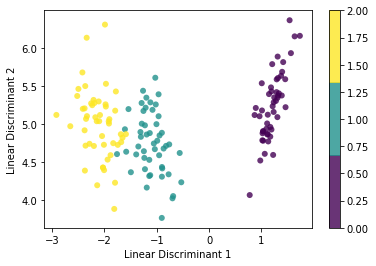

In [7]:
# Cargamos un set de datos
data = datasets.load_iris()
X, y = data.data, data.target

# Ahora vamos a proyectar los datos en dos dimensiones
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

# Identificamos las dos dimensiones que mejor separan los datos
x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

## **Ahora probemos utilizando el algoritmo de la biblioteca de sklearn**

In [8]:
# Importamos el algoritmo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

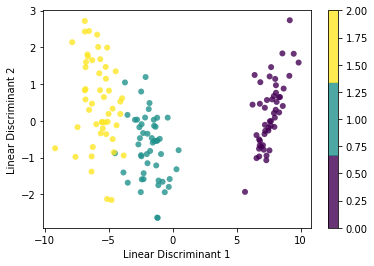

In [9]:
# Entrenamos al algoritmo
lda_sk = LinearDiscriminantAnalysis(n_components=2)
lda_sk.fit(X, y)
X_projected_sk = lda_sk.transform(X)

# Generamos las proyecciones
x1_sk, x2_sk = X_projected_sk[:, 0], X_projected_sk[:, 1]

plt.scatter(x1_sk, x2_sk, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()